# <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: MarkupSafe>=0.23 in c:\users\gayus\anaconda3\lib\site-packages (from jinja2<3.2,>=2.11.1->pandas_profiling) (1.1.1)



In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from __future__ import division
from sklearn.cluster import KMeans
# Implement learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn import model_selection as cross_validation
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import xgboost as xgb
plt.style.use("ggplot")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import lifetimes
import datetime
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
from datetime import datetime, timedelta,date

In [4]:
##Dataset Import:
from sklearn import datasets
from sklearn.datasets import load_iris

## Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

##Importing ensemble and ML Models:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import pandas_profiling
##Importing sklearn model selection and metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

## <CENTER><U> 2. READING DATA </CENTER></U>`

In [5]:
fraud_data = pd.read_csv('Data_Processing/FraudData_RandomSample.csv')
fraud_data.count()

Unnamed: 0               300000
trans_date_trans_time    300000
cc_num                   300000
merchant                 300000
category                 300000
amt                      300000
first                    300000
last                     300000
gender                   300000
street                   300000
city                     300000
state                    300000
zip                      300000
lat                      300000
long                     300000
city_pop                 300000
job                      300000
dob                      300000
trans_num                300000
unix_time                300000
merch_lat                300000
merch_long               300000
is_fraud                 300000
dtype: int64

In [6]:
fraud_data.tail(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
299995,591928,2019-09-08 11:22:12,4.244954e+18,fraud_Roberts-Beahan,misc_pos,35.94,Christopher,Odom,M,81446 Nicole Highway Apt. 874,...,39.4850,-74.8776,825,Licensed conveyancer,1991-07-06,6dea9acbfd8c2b7b97862ce58e3f4983,1347103332,38.762023,-74.957725,0
299996,377064,2019-06-23 04:27:23,3.560247e+15,fraud_Kunze Inc,grocery_pos,88.58,Sarah,Scott,F,03090 Fisher Forges Apt. 200,...,37.6223,-97.3136,409656,Textile designer,1930-10-21,e10e65c15d38a9ff78effdb03bb0e3f6,1340425643,38.444081,-97.488754,0
299997,106982,2019-03-03 01:06:07,3.015345e+13,fraud_Bruen-Yost,misc_pos,16.63,Robin,Smith,F,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908,Radio producer,1962-04-05,a0268587a5c29085b1279c7a1f0a55b9,1330736767,31.973577,-98.934545,0
299998,779141,2019-11-30 04:11:08,4.715742e+18,fraud_Corwin-Gorczany,misc_net,40.91,Robert,Drake,M,463 Willie Estates,...,36.6966,-96.7869,471,Sub,1941-03-30,6bd5fd66df9a9b8ebdf1b6c70da58223,1354248668,36.753618,-95.914743,0
299999,154820,2019-03-24 04:23:36,3.518235e+15,fraud_Conroy-Cruickshank,gas_transport,78.06,Barbara,Lowe,F,67210 Lori Creek,...,33.6372,-96.6184,46563,Systems developer,1970-09-11,835c5a357db461ca804c3df5adff74fc,1332563016,33.756980,-96.078755,0


## <CENTER><U> 3. EXPLORATORY ANALYSIS</CENTER></U>

In [8]:
fraud_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,518672,12/23/2020 8:25,4.470000e+15,fraud_Kilback LLC,grocery_pos,167.42,Matthew,Russell,M,168 Michael Coves Suite 343,...,37.7773,-119.0825,633,Health service manager,9/9/1927,8c1e3a9480e34876c75af5b1b533e53e,1387787153,38.492626,-118.677235,0
1,1103482,2020-04-04 11:57:59,2.233883e+15,fraud_Huels-Hahn,gas_transport,46.91,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,33.3570,-89.0473,1923,Medical physicist,1960-01-16,42f7a414a3fea93f52df911719625a00,1365076679,33.193352,-90.017058,0
2,777216,2019-11-29 10:12:42,6.759099e+11,"fraud_Watsica, Haag and Considine",shopping_pos,8.46,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,...,41.1360,-73.7009,7987,Television/film/video producer,1964-03-16,3070934ee3fb99b3bcd65be2f7dda261,1354183962,41.493080,-74.290518,0
3,698728,2019-10-25 18:35:11,3.770267e+14,fraud_Gerhold LLC,home,112.71,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,430986c6f1a78c45b42cef37c35b5dfe,1351190111,36.342555,-91.407343,0
4,945306,2020-01-12 22:52:03,4.585133e+12,"fraud_Durgan, Gislason and Spencer",home,56.41,Karen,Gordon,F,543 Ware Path Apt. 593,...,39.7417,-93.6289,271,Land/geomatics surveyor,1972-04-18,f3c652aa1f6bf58e2109e29631569d66,1358031123,39.435902,-93.064931,0


Checking how are other features related to is_fraud Column

### TRANSACTION AMOUNT VS FRAUD

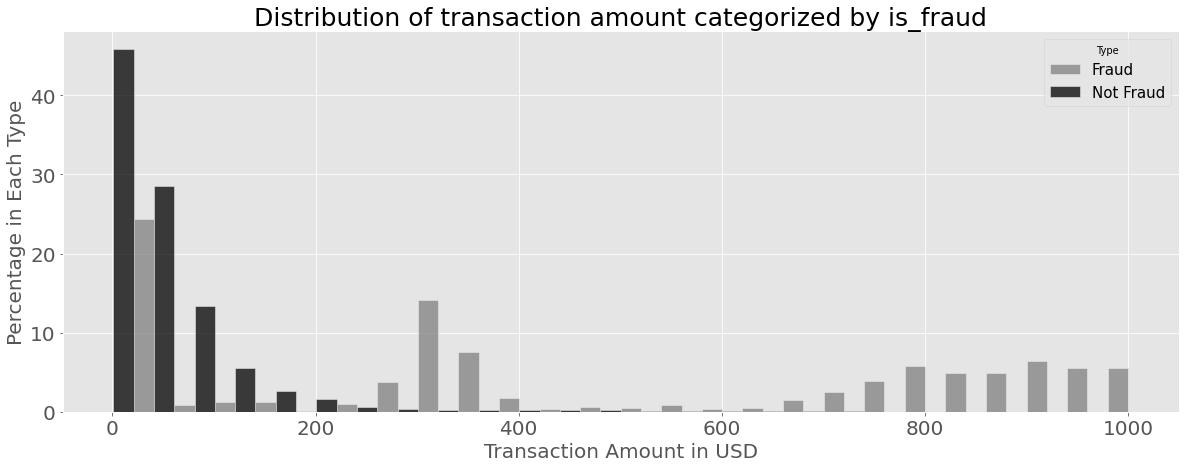

In [9]:
#amount vs fraud
plt.figure(figsize=(20,7))
ax=sns.histplot(x='amt',data=fraud_data[fraud_data.amt<=1000],hue='is_fraud',stat='percent',palette=['black','gray'],multiple='dodge',common_norm=False,bins=25)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=15)\

plt.title('Distribution of transaction amount categorized by is_fraud',fontsize=25)
plt.xlabel('Transaction Amount in USD',fontsize=20)
plt.ylabel('Percentage in Each Type',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

### <B>GENDER VS FRAUD

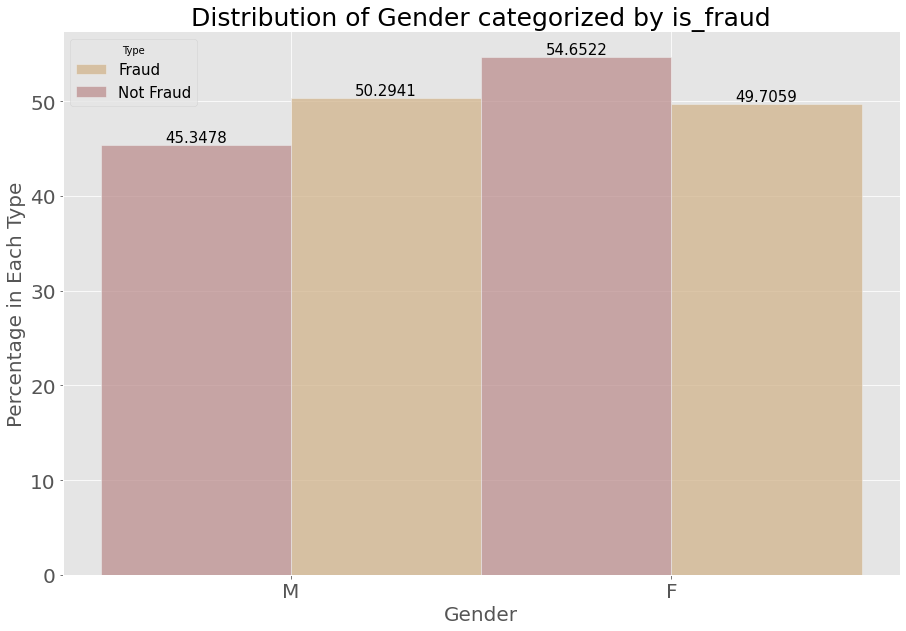

In [10]:
#amount vs fraud
plt.figure(figsize=(15,10))
ax=sns.histplot(x='gender',data=fraud_data[fraud_data.amt<=1000],hue='is_fraud',stat='percent',palette=['rosybrown','tan'],multiple='dodge',common_norm=False,bins=25)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=15)
plt.title('Distribution of Gender categorized by is_fraud',fontsize=25)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Percentage in Each Type',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
a1=ax.bar_label(ax.containers[0],color='black',fontsize=15)
a1=ax.bar_label(ax.containers[1],color='black',fontsize=15)
plt.show()

### <b> SPENDING CATEGORY VS FRAUD

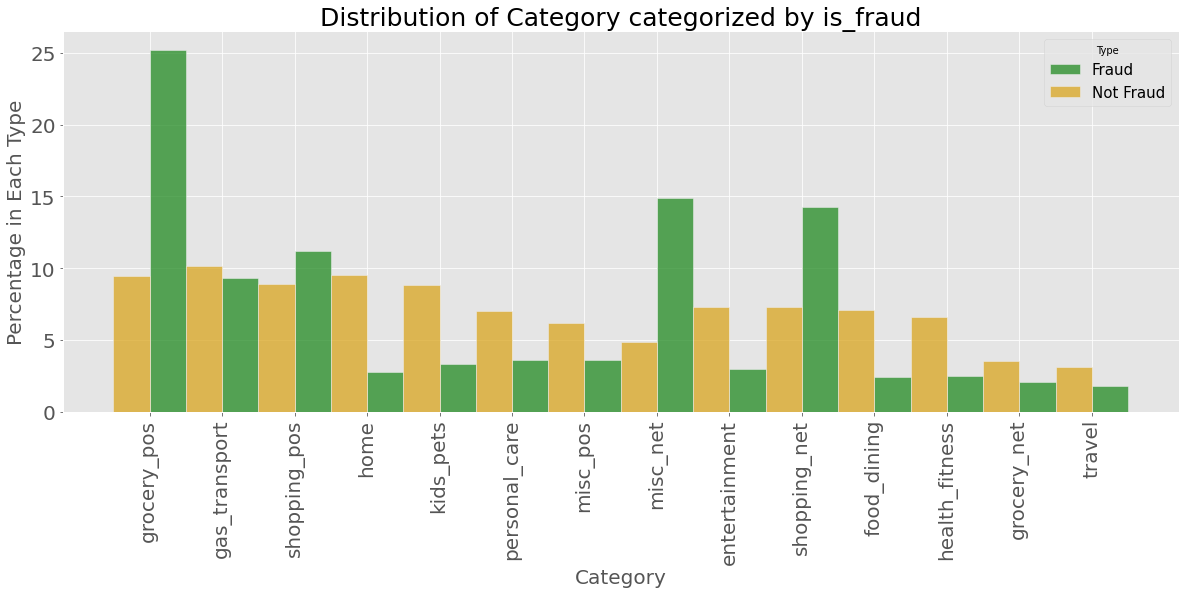

In [11]:
#amount vs fraud
plt.figure(figsize=(20,7))
ax=sns.histplot(x='category',data=fraud_data[fraud_data.amt<=1000],hue='is_fraud',palette=['goldenrod','forestgreen'],stat='percent',multiple='dodge',common_norm=False,bins=25)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=15)\

plt.title('Distribution of Category categorized by is_fraud',fontsize=25)
plt.xlabel('Category',fontsize=20)
plt.ylabel('Percentage in Each Type',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)
plt.show()

### SPENDING CATEGORY VS FRAUD

Third, we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if 'grocery_pos' accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

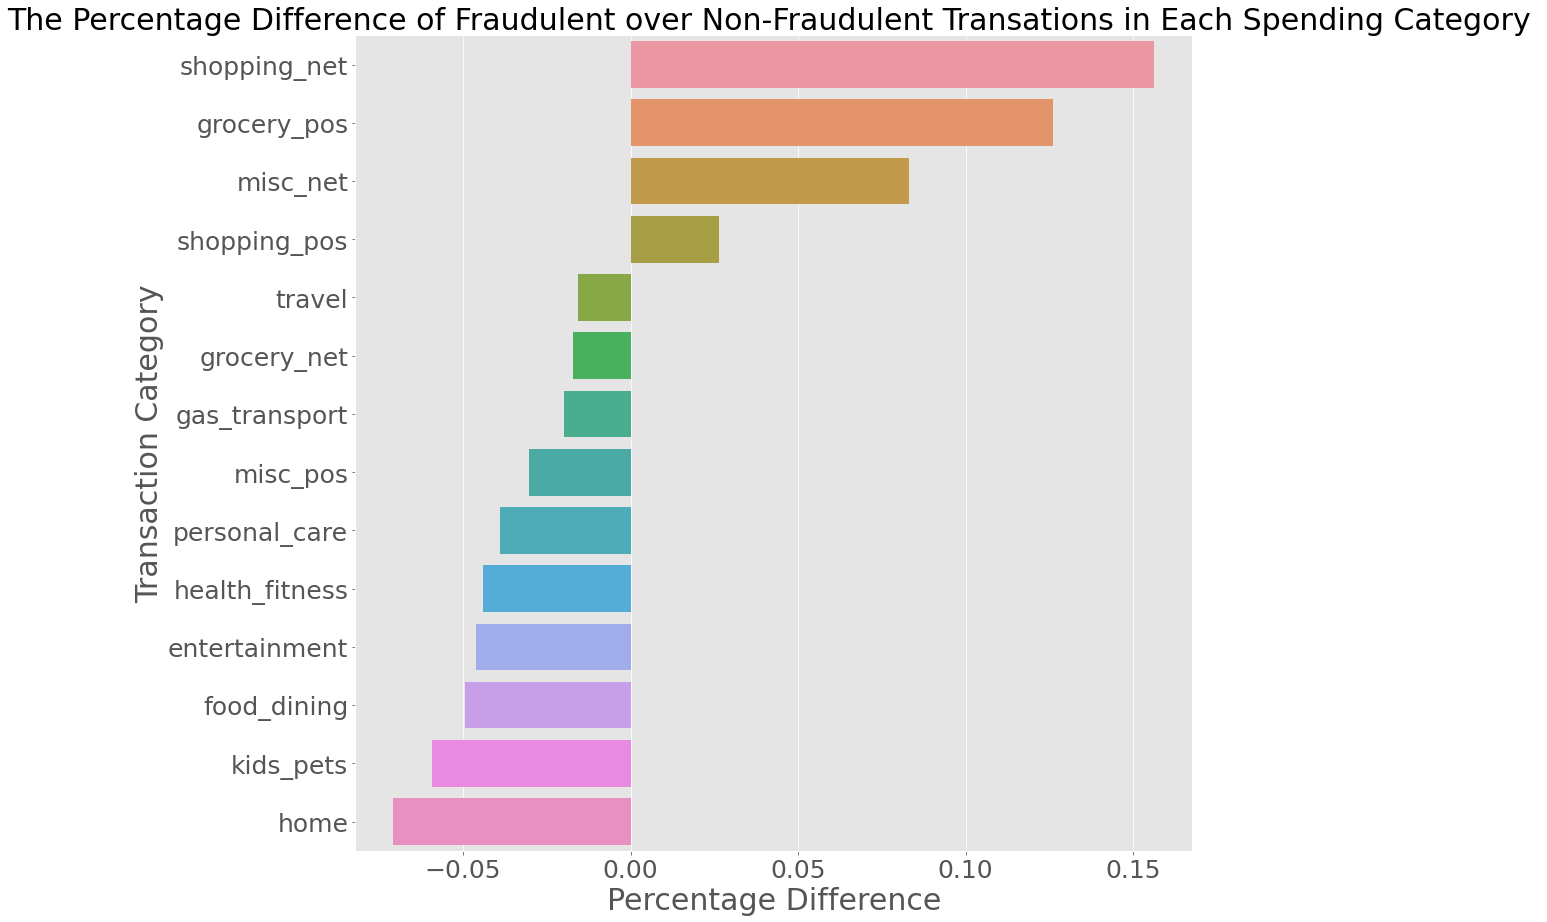

In [12]:
#calculate the percentage difference
plt.figure(figsize=(15,15))
a=fraud_data[fraud_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=fraud_data[fraud_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
plt.xlabel('Percentage Difference',fontsize=30)
plt.ylabel('Transaction Category',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ',fontsize=30)
plt.show()

### AGE VS FRAUD

In [13]:
fraud_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

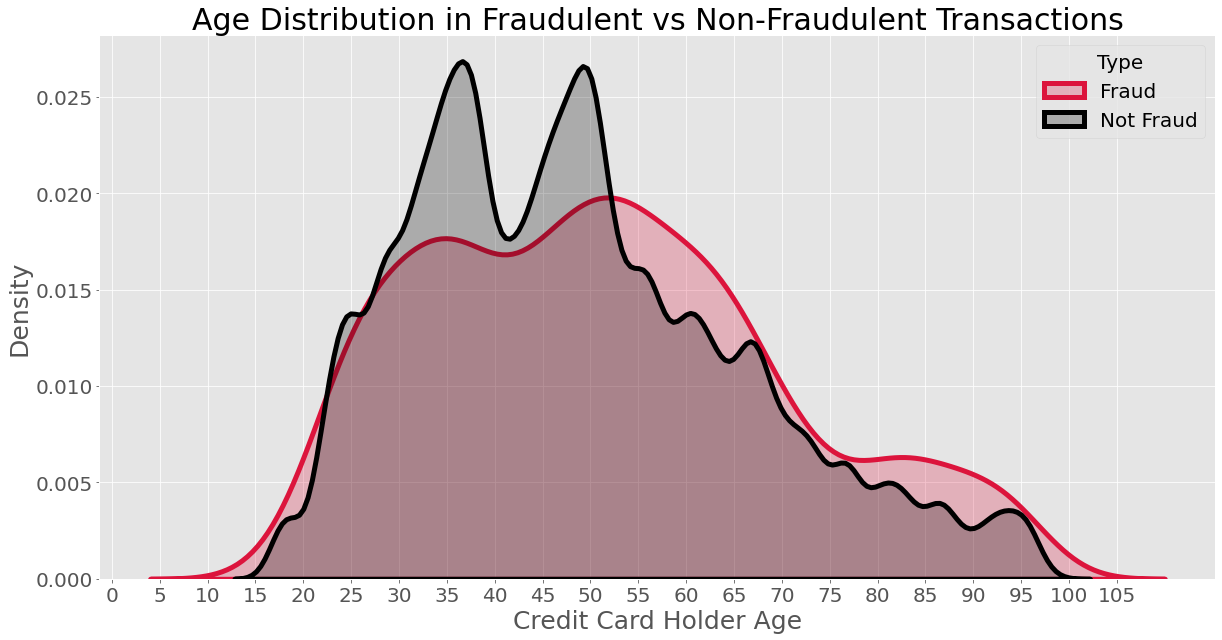

In [14]:
#age vs fraud
import datetime as dt
plt.figure(figsize=(20,10))
fraud_data['age']=dt.date.today().year-pd.to_datetime(fraud_data['dob']).dt.year
ax=sns.kdeplot(x='age',data=fraud_data, hue='is_fraud', common_norm=False,palette=['black','crimson'],fill=1,linewidth=5)
plt.xlabel('Credit Card Holder Age',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.xticks(np.arange(0,110,5))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions',fontsize=30)
plt.rcParams['legend.title_fontsize'] = 20
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=20)
plt.show()

### CYCLICALITY OF FRAUD

How do fraudulent transactions distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

#### Hourly Trend

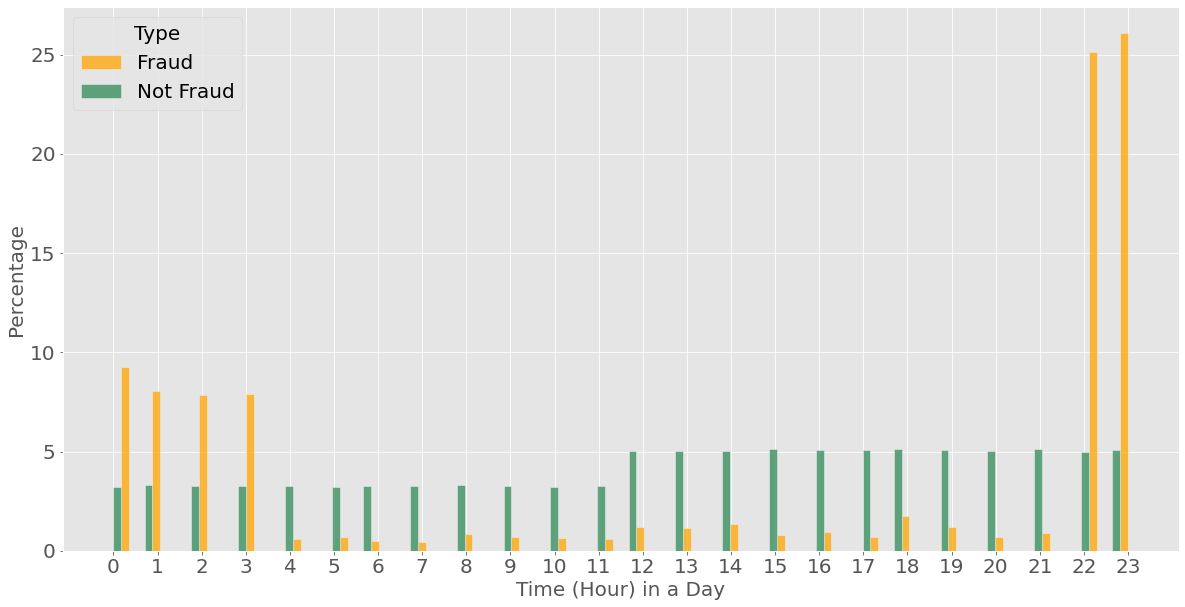

In [15]:
#time in a day vs fraud
plt.figure(figsize=(20,10))
fraud_data['hour']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=fraud_data, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette=['seagreen','orange'])
plt.ylabel('Percentage',fontsize=20)
plt.xlabel('Time (Hour) in a Day',fontsize=20)
plt.xticks(np.arange(0,24,1))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=20)
plt.show()

#### Weekly Trend

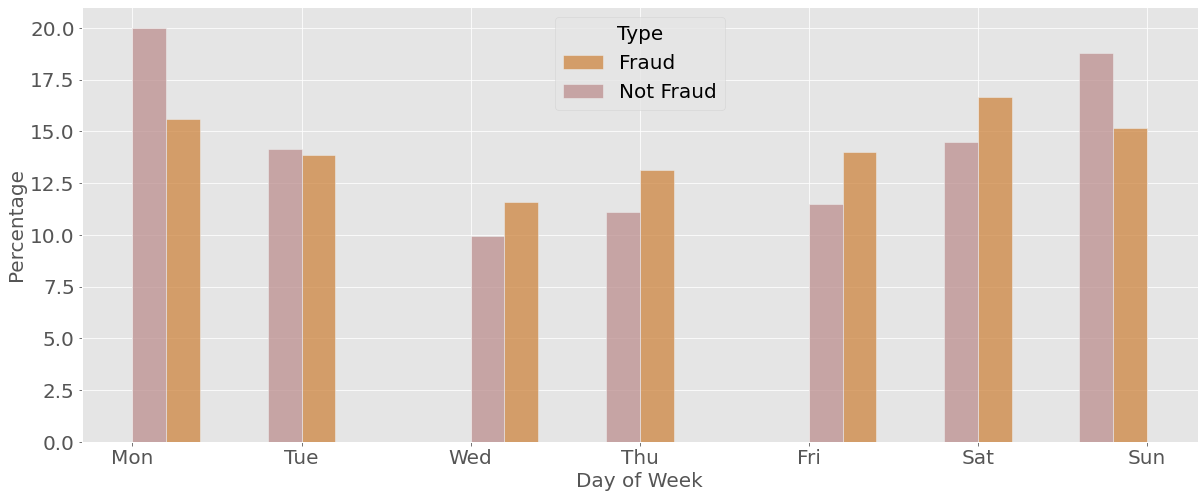

In [16]:
#day of week vs fraud
plt.figure(figsize=(20,8))
fraud_data['day']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=fraud_data, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',binwidth=0.4,palette=['rosybrown','peru'])
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.ylabel('Percentage',fontsize=20)
plt.xlabel('Day of Week',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=20)
plt.show()

#### Monthly Trend

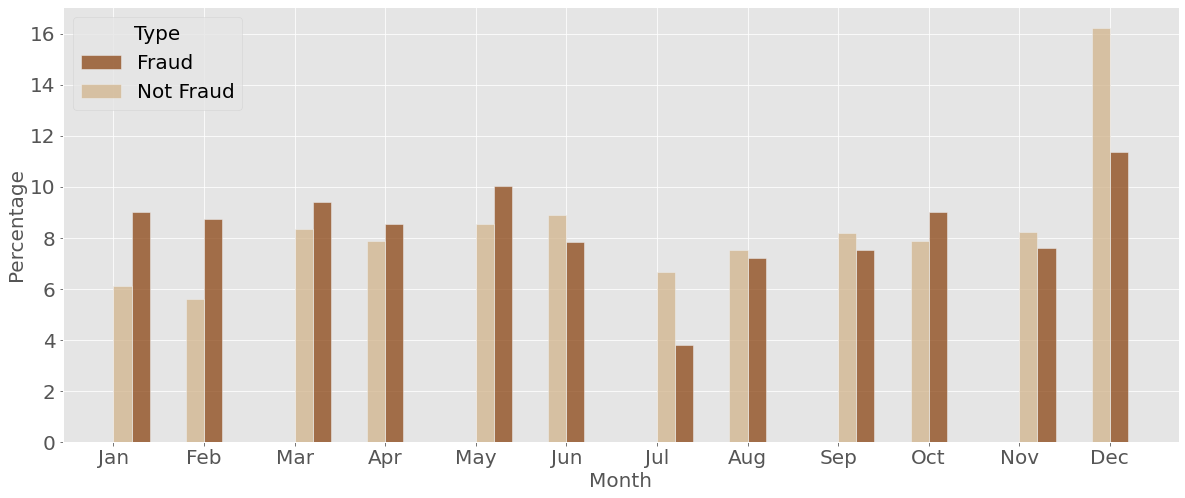

In [17]:
#month vs fraud
plt.figure(figsize=(20,8))
fraud_data['month']=pd.to_datetime(fraud_data['trans_date_trans_time']).dt.month
ax=sns.histplot(data=fraud_data, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',binwidth=0.4,palette=['tan','saddlebrown'])
plt.ylabel('Percentage',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.xticks(np.arange(1,13,1))
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'],fontsize=20)
plt.show()

Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend

### TOP 10 STATES WITH MOST FRAUDS

In [18]:
order_df = fraud_data.loc[fraud_data['is_fraud'] == 1]

In [19]:
state_count = order_df.groupby(['state']).is_fraud.value_counts().reset_index(name='Count')

In [20]:
top_states = state_count.sort_values(ascending=False,by='Count').head(10)
top_states

,state,is_fraud,Count
33,NY,1,112
42,TX,1,99
37,PA,1,90
4,CA,1,59
34,OH,1,57
1,AL,1,56
8,FL,1,52
13,IL,1,52
21,MI,1,46
44,VA,1,44


In [21]:
bottom_states = state_count.sort_values(ascending=True,by='Count').head(10)
bottom_states

,state,is_fraud,Count
12,ID,1,1
10,HI,1,3
7,DC,1,3
38,RI,1,4
6,CT,1,5
27,ND,1,6
29,NH,1,7
25,MT,1,8
0,AK,1,9
32,NV,1,9


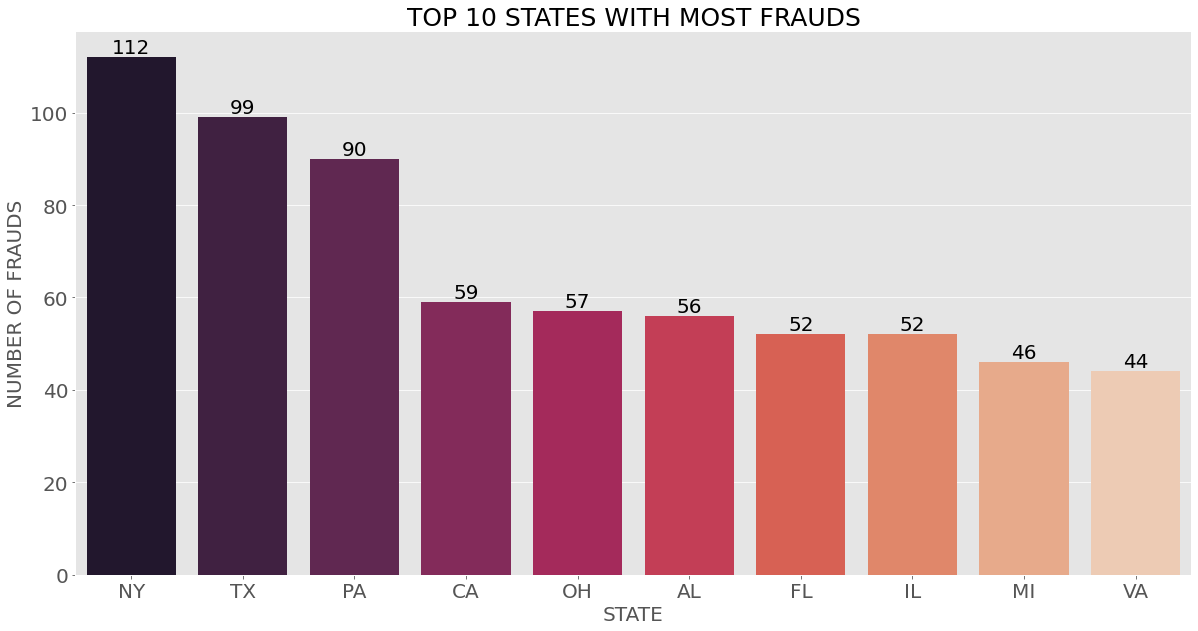

In [22]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='state', y='Count', data=top_states,palette='rocket')

plt.title('TOP 10 STATES WITH MOST FRAUDS',fontsize=25)
plt.xlabel('STATE',fontsize=20)
plt.ylabel('NUMBER OF FRAUDS',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
a1=ax.bar_label(ax.containers[0],color='black',fontsize=20)
plt.show()

### TOP 10 STATES WITH LEAST FRAUD

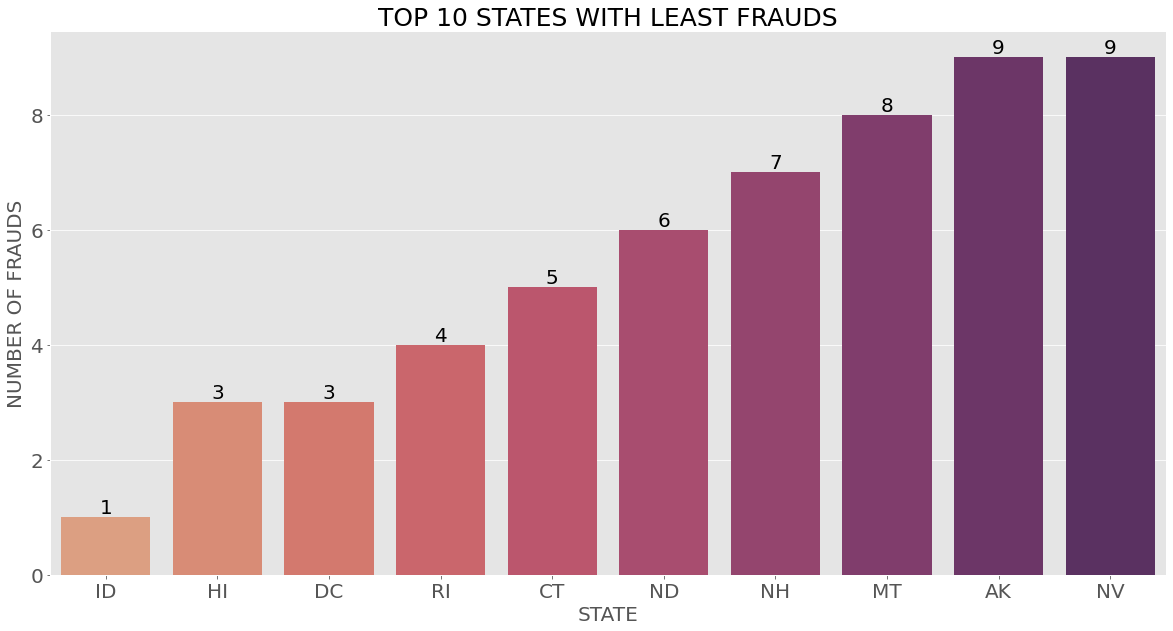

In [23]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='state', y='Count', data=bottom_states,palette='flare')

plt.title('TOP 10 STATES WITH LEAST FRAUDS',fontsize=25)
plt.xlabel('STATE',fontsize=20)
plt.ylabel('NUMBER OF FRAUDS',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
a1=ax.bar_label(ax.containers[0],color='black',fontsize=20)
plt.show()